### Imports

In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
# setting some options of pandas

pd.set_option('display.max_colwidth', 260)
pd.set_option('display.max_rows', 50)

### Loading in Dataset

In [3]:
data = pd.read_csv('D:/BE_Project/Data_json_csv/Lp_Unix_30_oct_news.csv', encoding = "utf-8")
# data = data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()


(1772, 17)


,Unnamed: 0,Sr,author,timestamp,title,text,Label (-2 to 2),spam_score,performance_score,facebook_likes,facebook_comments,facebook_shares,preprocess,stem,lem,cap,UnixTime
0,0,1,Bloomberg News,2018-10-30 0:00:00,Pot entrepreneurs target Asian money at Hong Kong investor forum - BNN Bloomberg,Seven years. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s how much jail time you can get just for smoking marijuana in Hong Kong. But that doesnÃƒÂ¢Ã‚Â€Ã‚Â™t mean you canÃƒÂ¢Ã‚Â€Ã‚Â™t invest in it.\n\n\nThatÃƒÂ¢Ã‚Â€Ã‚Â™s the message from executives at some of the worldÃƒÂ¢Ã‚Â€Ã‚Â™s ...,0.0,0.733,0.0,0.0,0.0,0.0,"Seven years. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s much jail time get smoking marijuana Hong Kong. But doesnÃƒÂ¢Ã‚Â€Ã‚Â™t mean canÃƒÂ¢Ã‚Â€Ã‚Â™t invest it. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s message executives worldÃƒÂ¢Ã‚Â€Ã‚Â™s hottest cannabis firms, gathering tomorrow cityÃƒÂ¢Ã‚Â€Ã‚Â™s five...","seven years. thatÃƒÂ¢Ã‚Â€Ã‚Â™ much jail time get smoke marijuana hong kong. but doesnÃƒÂ¢Ã‚Â€Ã‚Â™t mean canÃƒÂ¢Ã‚Â€Ã‚Â™t invest it. thatÃƒÂ¢Ã‚Â€Ã‚Â™ messag execut worldÃƒÂ¢Ã‚Â€Ã‚Â™ hottest cannabi firms, gather tomorrow cityÃƒÂ¢Ã‚Â€Ã‚Â™ five-star W hotel f...","Seven years. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s much jail time get smoke marijuana Hong Kong. But doesnÃƒÂ¢Ã‚Â€Ã‚Â™t mean canÃƒÂ¢Ã‚Â€Ã‚Â™t invest it. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s message executives worldÃƒÂ¢Ã‚Â€Ã‚Â™s hottest cannabis firms, gather tomorrow cityÃƒÂ¢Ã‚Â€Ã‚Â™s five-star...","SEVEN YEARS. THATÃƒÂ‚Ã‚Â€Ã‚Â™S MUCH JAIL TIME GET SMOKING MARIJUANA HONG KONG. BUT DOESNÃƒÂ‚Ã‚Â€Ã‚Â™T MEAN CANÃƒÂ‚Ã‚Â€Ã‚Â™T INVEST IT. THATÃƒÂ‚Ã‚Â€Ã‚Â™S MESSAGE EXECUTIVES WORLDÃƒÂ‚Ã‚Â€Ã‚Â™S HOTTEST CANNABIS FIRMS, GATHERING TOMORROW CITYÃƒÂ‚Ã‚Â€Ã‚Â™S FIVE...",1.540858e+09
1,1,2,NaN,2018-10-30 0:00:00,Distributed Dialogues: Political Censorship in China,"Distributed Dialogues: Political Censorship in China 2018-10-30 07:31 pm News 21 0\n\n\nOn the latest episode of Season 2 of Distributed Dialogues , the hosts took a deep dive into the state of political repression in the PeopleÃƒÂ¢Ã‚Â€Ã‚Â™s Republic of Ch...",0.0,0.000,0.0,0.0,0.0,0.0,"Distributed Dialogues: Political Censorship China 2018-10-30 07:31 pm News 21 0 On latest episode Season 2 Distributed Dialogues , hosts took deep dive state political repression PeopleÃƒÂ¢Ã‚Â€Ã‚Â™s Republic China. Interviewing experts dissidents Oslo Free...","distribut dialogues: polit censorship china 2018-10-30 07:31 pm new 21 0 On latest episod season 2 distribut dialogu , host took deep dive state polit repress peopleÃƒÂ¢Ã‚Â€Ã‚Â™ republ china. interview expert dissid oslo freedom festival, thorough examin c...","Distributed Dialogues: Political Censorship China 2018-10-30 07:31 pm News 21 0 On latest episode Season 2 Distributed Dialogues , host take deep dive state political repression PeopleÃƒÂ¢Ã‚Â€Ã‚Â™s Republic China. Interviewing experts dissidents Oslo Freed...","DISTRIBUTED DIALOGUES: POLITICAL CENSORSHIP CHINA 2018-10-30 07:31 PM NEWS 21 0 ON LATEST EPISODE SEASON 2 DISTRIBUTED DIALOGUES , HOSTS TOOK DEEP DIVE STATE POLITICAL REPRESSION PEOPLEÃƒÂ‚Ã‚Â€Ã‚Â™S REPUBLIC CHINA. INTERVIEWING EXPERTS DISSIDENTS OSLO FREE...",1.540858e+09
2,2,3,Trevor Kearing,2018-10-30 0:00:00,Sojourn (SOJ) Price Tops $0.23 on Exchanges - Daily Political,"Tweet\n\n\nSojourn (CURRENCY:SOJ) traded flat against the dollar during the twenty-four hour period ending at 17:00 PM Eastern on October 30th. Sojourn has a total market cap of $113,909.00 and $0.00 worth of Sojourn was traded on exchanges in the last 24 ...",0.0,0.002,0.0,0.0,0.0,0.0,"Tweet Sojourn (CURRENCY:SOJ) traded flat dollar twenty-four hour period ending 17:00 PM Eastern October 30th. Sojourn total market cap $113,909.00 $0.00 worth Sojourn traded exchanges last 24 hours. In last seven days, Sojourn traded flat dollar. One Sojou...","tweet sojourn (currency:soj) trade flat dollar twenty-four hour period end 17:00 PM eastern octob 30th. sojourn total market cap $113,909.00 $0.00 worth sojourn trade exchang last 24 hours. In last seven days, sojourn trade flat dollar. one sojourn coin cu...","Tweet Sojourn (C

Removing all columns except the airline_sentiment and text column.

### Removing non-ascii character

In [4]:

def pre(row):
    row = re.sub(r'[^\x00-\x7F]+','',str(row))
    return row

data['preprocess'] = data['preprocess'].apply(pre)

In [5]:
data['preprocess']

0       Seven years. Thats much jail time get smoking marijuana Hong Kong. But doesnt mean cant invest it. Thats message executives worlds hottest cannabis firms, gathering tomorrow citys five-star W Hotel forum investment opportunities markets legal. To safe, org...
1       Distributed Dialogues: Political Censorship China 2018-10-30 07:31 pm News 21 0 On latest episode Season 2 Distributed Dialogues , hosts took deep dive state political repression Peoples Republic China. Interviewing experts dissidents Oslo Freedom Festival...
2       Tweet Sojourn (CURRENCY:SOJ) traded flat dollar twenty-four hour period ending 17:00 PM Eastern October 30th. Sojourn total market cap $113,909.00 $0.00 worth Sojourn traded exchanges last 24 hours. In last seven days, Sojourn traded flat dollar. One Sojou...
3       Happy Anniversary Bitcoin! It Halloween 2008 Satoshi Nakamoto, may pseudonym one programmers, published paper titled Bitcoin: A Peer-to-Peer Electronic Cash System. Did he, know unleashed?

In [6]:
data = data[['Label (-2 to 2)', 'preprocess']]
data.head(50)

,Label (-2 to 2),preprocess
0,0.0,"Seven years. Thats much jail time get smoking marijuana Hong Kong. But doesnt mean cant invest it. Thats message executives worlds hottest cannabis firms, gathering tomorrow citys five-star W Hotel forum investment opportunities markets legal. To safe, org..."
1,0.0,"Distributed Dialogues: Political Censorship China 2018-10-30 07:31 pm News 21 0 On latest episode Season 2 Distributed Dialogues , hosts took deep dive state political repression Peoples Republic China. Interviewing experts dissidents Oslo Freedom Festival..."
2,0.0,"Tweet Sojourn (CURRENCY:SOJ) traded flat dollar twenty-four hour period ending 17:00 PM Eastern October 30th. Sojourn total market cap $113,909.00 $0.00 worth Sojourn traded exchanges last 24 hours. In last seven days, Sojourn traded flat dollar. One Sojou..."
3,1.0,"Happy Anniversary Bitcoin! It Halloween 2008 Satoshi Nakamoto, may pseudonym one programmers, published paper titled Bitcoin: A Peer-to-Peer Electronic Cash System. Did he, know unleashed? Ten years later, digital currency developed still unknown creator v..."
4,1.0,"Coinbase valued $8 billion latest fundraising round Tuesday, October 30, 2018 9:36 a.m. EDT (Reuters) - Coinbase, one top U.S. cryptocurrency exchanges, said Tuesday raised another $300 million funding round led Tiger Global Management, valuing firm $8 bil..."
5,0.0,"October 30, 2018 22:33 CET Swamp Drained? 64% US Voters Fear Politicians Will Misuse Crypto Donations Mistrust politicians nothing new, perception bitcoin crypto tokens unregulated heightened suspicions eligible US voters. According survey conducted blockc..."
6,0.0,"October 30, 2018 21:30 CET Oyster Protocol Founder Exit Scams, Steals $300,000 ICO Smart Contract Advertisement Twitter Facebook Oyster Protocol hybrid IOTA/Ethereum smart contract platform designed help websites garner revenue. Instead traditional adverti..."
7,-1.0,"Happy Anniversary Bitcoin! It Halloween 2008 Satoshi Nakamoto, may pseudonym one programmers, published paper titled Bitcoin: A Peer-to-Peer Electronic Cash System. Did he, know unleashed? Ten years later, digital currency developed still unknown creator v..."
8,0.0,"Russias Financial Watchdog Oversee Cryptocurrency Industry Economy & Regulation Russias Federal Financial Monitoring Service revealed regulate cryptocurrency-related transactions country, senior official saying agency also oversee broader cryptocurrency in..."
9,-1.0,"It's looks like huge correction way Bitcoin , worst yet te coin like Ethereum, litecoin , XRP Ethereum Classic . We middle crypto correction , long way go ."


In [7]:
# getting only labelled data
data = data.head(750)

### Data exploration

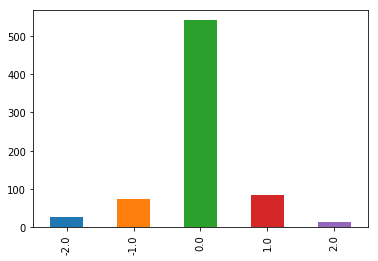

In [8]:
data['Label (-2 to 2)'].value_counts().sort_index().plot.bar()

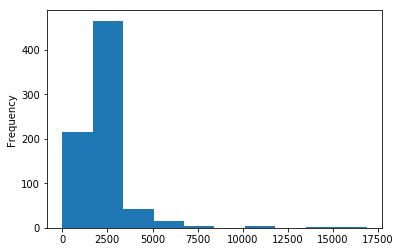

In [9]:
data['preprocess'].str.len().plot.hist()

In [10]:
data.shape

(750, 2)

### Preprocessing

In [11]:
data.isnull().sum()

Label (-2 to 2)    7
preprocess         0
dtype: int64

In [12]:
data.dropna(subset=['Label (-2 to 2)'], inplace=True)
data.isnull().sum()

Label (-2 to 2)    0
preprocess         0
dtype: int64

data['text'] = data['text'].str.replace('@VirginAmerica', '')
data.head()

In [13]:
data['preprocess'].apply(lambda x: x.lower()) #transform text to lowercase
data['preprocess'] = data['preprocess'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['preprocess'].head()

0    Seven years Thats much jail time get smoking marijuana Hong Kong But doesnt mean cant invest it Thats message executives worlds hottest cannabis firms gathering tomorrow citys fivestar W Hotel forum investment opportunities markets legal To safe organizer ...
1    Distributed Dialogues Political Censorship China 20181030 0731 pm News 21 0 On latest episode Season 2 Distributed Dialogues  hosts took deep dive state political repression Peoples Republic China Interviewing experts dissidents Oslo Freedom Festival thoro...
2    Tweet Sojourn CURRENCYSOJ traded flat dollar twentyfour hour period ending 1700 PM Eastern October 30th Sojourn total market cap 11390900 000 worth Sojourn traded exchanges last 24 hours In last seven days Sojourn traded flat dollar One Sojourn coin curren...
3    Happy Anniversary Bitcoin It Halloween 2008 Satoshi Nakamoto may pseudonym one programmers published paper titled Bitcoin A PeertoPeer Electronic Cash System Did he know unleashed Ten years later digi

Tokenizer from keras - 
maximum no. of rows = 5000
pad sequence = sentences of same length


In [14]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['preprocess'].values)

X = tokenizer.texts_to_sequences(data['preprocess'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0, ..., 2997, 1671,   36],
       [   0,    0,    0, ...,  545, 2479,  391],
       [   0,    0,    0, ...,   48,   11,   84],
       [   0,    0,    0, ...,  808,  461,  156],
       [   0,    0,    0, ...,  272,  517,   91]])

In [15]:
print(X.shape[1])

1814


### Creating model

squential model is simplest 
model.add adds new layers to network
Dropout is used for regularization(decreasing overfitting)
256 - no. of units in each layer
Dense connection - every neuron of 1 layer connected to every other neuron of next layer

In [16]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

compiling - takes sets 2 things 
For adam it is 0.001, reach up to 85% accuracy in 5 epochs
1. optimizer - learning rate
2. loss function - log function

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1814, 256)         1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1814, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1814, 256)         525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 2,331,909
Trainable params: 2,331,909
Non-trainable params: 0
_________________________________________________________________


In [21]:
y = pd.get_dummies(data['Label (-2 to 2)']).values
print(y)
# print(data['Label (-2 to 2)'])
[print(data['Label (-2 to 2)'][i], y[i]) for i in range(0,50)]

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
1.0 [0 0 0 1 0]
1.0 [0 0 0 1 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
-1.0 [0 1 0 0 0]
0.0 [0 0 1 0 0]
-1.0 [0 1 0 0 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
1.0 [0 0 0 1 0]
1.0 [0 0 0 1 0]
-1.0 [0 1 0 0 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
1.0 [0 0 0 1 0]
1.0 [0 0 0 1 0]
0.0 [0 0 1 0 0]
-1.0 [0 1 0 0 0]
-2.0 [1 0 0 0 0]
1.0 [0 0 0 1 0]
1.0 [0 0 0 1 0]
0.0 [0 0 1 0 0]
-1.0 [0 1 0 0 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
-2.0 [1 0 0 0 0]
1.0 [0 0 0 1 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
1.0 [0 0 0 1 0]
-1.0 [0 1 0 0 0]
1.0 [0 0 0 1 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
1.0 [0 0 0 1 0]
1.0 [0 0 0 1 0]
1.0 [0 0 0 1 0]
0.0 [0 0 1 0 0]
-1.0 [0 1 0 0 0]
0.0 [0 0 1 0 0]
0.0 [0 0 1 0 0]
1.0 [0 0 0 1 0]
0.0 [0 0 1 0 0]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

training - 70%
testing - 30%

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
print(X.shape)
print(y.shape)

(743, 1814)
(743, 5)


In [40]:
print(X_test.shape)

(223, 1814)


### Training model

Can include
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [24]:
batch_size = 32
epochs = 6

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/6
 - 6145s - loss: 1.0870 - acc: 0.7019
Epoch 2/6
 - 2368s - loss: 0.6920 - acc: 0.7269
Epoch 3/6
 - 2400s - loss: 0.5452 - acc: 0.7731
Epoch 4/6
 - 3990s - loss: 0.4831 - acc: 0.8231
Epoch 5/6
 - 3266s - loss: 0.4528 - acc: 0.8192
Epoch 6/6
 - 3306s - loss: 0.3934 - acc: 0.8404


Saving modelling using Pickle

In [33]:
with open('model_news_feeds', 'wb') as f: 
    pickle.dump(model, f)

In [34]:
with open('model_news_feeds', 'rb') as f:
    mp = pickle.load(f)

### Testing model

In [35]:
predictions = mp.predict(X_test)


# [print(data['step1'][i], predictions[i], y_test[i]) for i in range(0, 5)]

In [36]:
vpos_count, pos_count, neu_count, neg_count, vneg_count = 0, 0, 0, 0, 0 
real_vpos, real_pos, real_neu, real_neg, real_vneg = 0, 0, 0, 0, 0
for i, prediction in enumerate(predictions):
    
    if np.argmax(prediction) == 0:
        vpos_count += 1
    elif np.argmax(prediction) == 1:
        pos_count += 1
    elif np.argmax(prediction) == 2:
        neu_count += 1
    elif np.argmax(prediction) == 3:
        neg_count += 1
    else:
        vneg_count += 1
        
        
    
    if np.argmax(y_test[i]) == 0:
        real_vpos += 1
    elif np.argmax(y_test[i]) == 1:    
        real_pos += 1
    elif np.argmax(y_test[i]) == 2:    
        real_neu += 1
    elif np.argmax(y_test[i]) == 3:    
        real_neg += 1
    else:
        real_vneg +=1

print('Very_Positive predictions:', vpos_count)
print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Very_Negative predictions:', vneg_count)

print()
print('Real very_positive:', real_vpos)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)
print('Real very_negative:', real_vneg)

Very_Positive predictions: 0
Positive predictions: 29
Neutral predictions: 180
Negative predictions: 14
Very_Negative predictions: 0

Real very_positive: 7
Real positive: 25
Real neutral: 163
Real negative: 24
Real very_negative: 4


Total Wrong Predictions

In [37]:
sum = abs(vpos_count - real_vpos)
sum += abs(pos_count - real_pos)
sum += abs(neu_count - real_neu)
sum += abs(neg_count - real_neg)
sum += abs(vneg_count - real_vneg)
print(sum)

42


Total Error

In [38]:
print(sum/len(X_test)*100)

18.83408071748879
